## Dataset Description

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/<br>
The features of the dataset are:<br>
   1 - fixed acidity<br>
   2 - volatile acidity<br>
   3 - citric acid<br>
   4 - residual sugar<br>
   5 - chlorides<br>
   6 - free sulfur dioxide<br>
   7 - total sulfur dioxide<br>
   8 - density<br>
   9 - pH<br>
   10 - sulphates<br>
   11 - alcohol

And the classes of the dataset are<br>
   12 - quality (score between 3 and 9)


### The goal is to train models that can predict the quality of a wine based on the attributes of the sample we provide

This is a multiclass classification problem since it has values ranging from 3 to 9.<br>
We use 3000 samples to train the models and we use 100 to test them

Each of the algorithm code cell is followed by another one <br>where we test the accuracy for both the training and the testing set<br>
The function where we calculate the accuracy is defined in the first cell of the ipynb 




In [5]:
''' Here we import the dataset and we standarize the data to use it on the algorithms.
    Also we use the first 3000 rows of the dataset for the training set and the 100 next for the testing. '''


# Import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Function we use to standarize the data
def data_standarization(X):
    # Standarize the data
    X_mean = X.mean()
    X_std = X.std()
    X_scaled = (X - X_mean) / X_std

    return X_scaled

# Fucntion we use to calculate the accurasy of a model
def caclulate_accuracy(counts):
    total = np.sum(counts)
    for i in range(len(counts)):
        if i == 0:
            print("Percentage of correct predictions:",round(counts[0]*100/total,2),"%")
        else:
            print("Percentage of predictions with error of",i,"quality points:",round(counts[i]*100/total,2),"%")
            print(counts[i])


np.set_printoptions(suppress=True, linewidth=np.inf)

# Load the dataset from the data file
dataset = pd.read_csv('data/winequality-white.csv', delimiter=';')

# Extract the last column (labels)
quality = dataset.iloc[:, 11]

# Exclude the last column which contains the class
X = dataset.iloc[:, :11]

# Store the standardized features in X_train
X = data_standarization(X)

# Concatenate the first column with X_train
X = np.column_stack((quality, X))

# Shuffle the data
np.random.shuffle(X)

# Devide the dataset to training and testing set
X_train = X[:3000,1:]
y_train = labels = X[:3000,0] 

X_test = X[3001:3101,1:]
y_test = X[3001:3101,0]

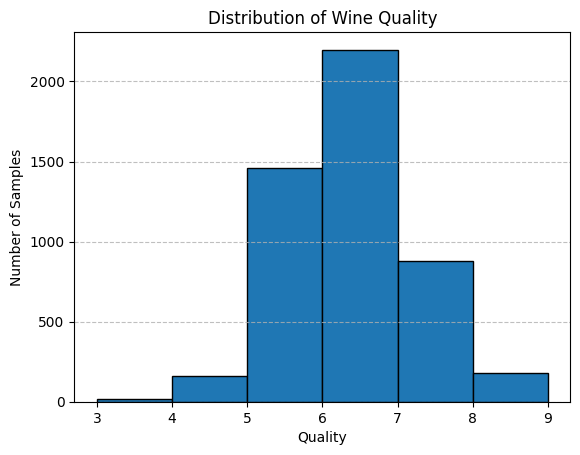

In [18]:
# Plot the distribution of Wine Quality
plt.hist(dataset['quality'], bins=range(3, 10), edgecolor='black', alpha=1)
plt.xlabel('Quality')
plt.ylabel('Number of Samples')
plt.title('Distribution of Wine Quality')
plt.xticks(range(3, 10))
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

### PCA Analysis

The following code performs Principal Component Analysis (PCA) on the dataset to reduce its dimensionality.

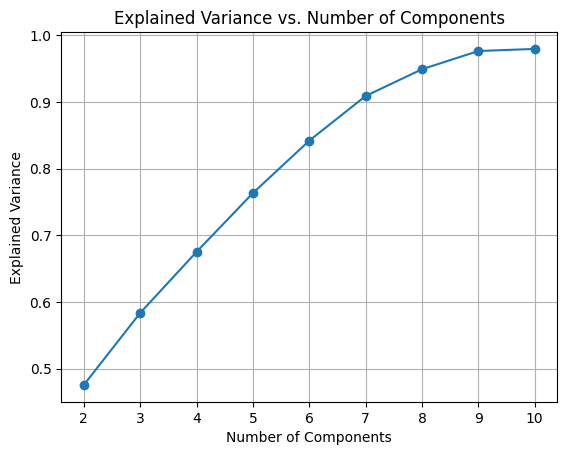

In [19]:
def PCA(X, num_components):
    # Exclude the class
    X = X[:, 1:]

    # Step 2: Compute the Covariance Matrix
    covariance_matrix = np.cov(X, rowvar=False)

    # Step 3: Eigen Decomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Select Principal Components
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_indices = sorted_indices[:num_components]
    top_eigenvectors = eigenvectors[:, top_indices]

    # Step 5: Projection
    projected_data = np.dot(X, top_eigenvectors)

    return projected_data



# Define the range of numbers of principal components to consider
num_component_range = range(2, 11)  # For example, consider from 1 to 10 components

# Calculate the measure (e.g., explained variance) for each number of components
explained_variances = []
for num_components in num_component_range:
    # Perform PCA
    pca_dataset = PCA(X_train, num_components)
    pca_dataset = np.column_stack((labels, pca_dataset))

    # Calculate the explained variance ratio
    explained_variance = np.sum(np.var(pca_dataset, axis=0)) / np.sum(np.var(X_train, axis=0))
    explained_variances.append(explained_variance)

# Plot the measure against the number of components
plt.plot(num_component_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.xticks(num_component_range)
plt.grid(True)
plt.show()


### Least Squares Algorithm
This function applies a least squares regression model to classify the test data, where the predictions are rounded to the nearest integer and clipped to ensure they fall within a specified range.

In [20]:
# Function for least squares classifier
def least_squares_classifier(X_train, y_train, X_test):

    # Add bias term
    X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    # Compute weights using least squares
    weights = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

    # Make predictions
    predictions = X_test_with_bias @ weights

    # Clip predictions to ensure they're within the valid range
    predictions = np.clip(predictions, 3, 9)

    # Round predictions to the nearest integer
    rounded_predictions = np.round(predictions)
    
    return rounded_predictions.astype(int)


In [21]:
# Get predictions using the least squares classifier
predictions_test = least_squares_classifier(X_train, y_train, X_test)
predictions_train =  least_squares_classifier(X_train, y_train, X_train)

# Compute absolute differences
absolute_errors_test = np.abs(predictions_test - y_test)
absolute_errors_train = np.abs(predictions_train - y_train)

# Count occurrences of each integer
counts_test = np.bincount(absolute_errors_test.astype(int))
counts_train = np.bincount(absolute_errors_train.astype(int))

print("Accuracy of test dataset")
caclulate_accuracy(counts_test)

print("Accuracy of train dataset")
caclulate_accuracy(counts_train)

Accuracy of test dataset
Percentage of correct predictions: 57.0 %
Percentage of predictions with error of 1 quality points: 38.0 %
38
Percentage of predictions with error of 2 quality points: 5.0 %
5
Accuracy of train dataset
Percentage of correct predictions: 51.47 %
Percentage of predictions with error of 1 quality points: 43.5 %
1305
Percentage of predictions with error of 2 quality points: 4.73 %
142
Percentage of predictions with error of 3 quality points: 0.27 %
8
Percentage of predictions with error of 4 quality points: 0.03 %
1


### Logistic Regression model

### K Nearest
In summary, the knn function classifies each test sample by finding its k nearest neighbors in the training data and assigning the class label that is most common among those neighbors.

In [8]:
# This function computes the Euclidean distance between two points x1x1​ and x2x2
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn(X_train, y_train, X_test, k):
    predictions = []
    for test_sample in X_test:
        # Compute distances between test sample and all training samples
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in X_train]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Get the labels of the k nearest neighbor training samples
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Perform majority vote to get the predicted label
        most_common = np.argmax(np.bincount(k_nearest_labels))
        predictions.append(most_common)
   
    return np.array(predictions)


In [9]:
# Get predictions using the knn algorithm
predictions_test = knn(X_train, y_train, X_test,k=5)
predictions_train = knn(X_train, y_train, X_train,k=5)

# Compute absolute differences
absolute_errors_test = np.abs(predictions_test - y_test)
absolute_errors_train = np.abs(predictions_train - y_train)

# Count occurrences of each integer
counts_test = np.bincount(absolute_errors_test.astype(int))
counts_train = np.bincount(absolute_errors_train.astype(int))

print("Accuracy of test dataset")
caclulate_accuracy(counts_test)

print("Accuracy of train dataset")
caclulate_accuracy(counts_train)


Accuracy of test dataset
Percentage of correct predictions: 52.0 %
Percentage of predictions with error of 1 quality points: 41.0 %
41
Percentage of predictions with error of 2 quality points: 7.0 %
7
Accuracy of train dataset
Percentage of correct predictions: 69.5 %
Percentage of predictions with error of 1 quality points: 25.1 %
753
Percentage of predictions with error of 2 quality points: 4.83 %
145
Percentage of predictions with error of 3 quality points: 0.53 %
16
Percentage of predictions with error of 4 quality points: 0.03 %
1


### Naive Bayes
This code implements a Gaussian Naive Bayes classifier for multiclass classification using the assumption of Gaussian distribution of features within each class and the Naive Bayes assumption of feature independence.

In [22]:
from scipy.stats import multivariate_normal

def fit(X_train, y_train):
    # Calculate class priors (prior probabilities)
    classes = np.unique(y_train)
    class_priors = {c: np.mean(y_train == c) for c in classes}
    
    # Calculate class means
    class_means = {c: np.mean(X_train[y_train == c], axis=0) for c in classes}
    
    # Calculate diagonal covariance matrices
    class_covs = {c: np.diag(np.var(X_train[y_train == c], axis=0)) for c in classes}
    
    return class_priors, class_means, class_covs

def predict(X_test, class_priors, class_means, class_covs):
    predictions = []
    for x in X_test:
        posteriors = []
        # Compute the posterior probability for each class
        for c in class_priors.keys():
            mean = class_means[c]
            cov = class_covs[c]
            # Calculate likelihood using multivariate Gaussian distribution
            likelihood = multivariate_normal.pdf(x, mean=mean, cov=cov, allow_singular=True)
            # Multiply likelihood by the prior probability
            posterior = likelihood * class_priors[c]
            posteriors.append(posterior)
        # Predict the class with the highest posterior probability
        predictions.append(list(class_priors.keys())[np.argmax(posteriors)])
    return np.array(predictions)

In [23]:
# Test the model
class_priors, class_means, class_covs = fit(X_train, y_train)

# Calculate predictions
predictions_test = predict(X_test, class_priors, class_means, class_covs)
predictions_train = predict(X_train, class_priors, class_means, class_covs)

# Compute absolute differences
absolute_errors_test = np.abs(predictions_test - y_test)
absolute_errors_train = np.abs(predictions_train - y_train)

# Count occurrences of each integer
counts_test = np.bincount(absolute_errors_test.astype(int))
counts_train = np.bincount(absolute_errors_train.astype(int))

print("Accuracy of test dataset")
caclulate_accuracy(counts_test)
caclulate_accuracy(counts_train)

Accuracy of test dataset
Percentage of correct predictions: 39.0 %
Percentage of predictions with error of 1 quality points: 51.0 %
51
Percentage of predictions with error of 2 quality points: 10.0 %
10
Percentage of correct predictions: 45.0 %
Percentage of predictions with error of 1 quality points: 46.27 %
1388
Percentage of predictions with error of 2 quality points: 7.67 %
230
Percentage of predictions with error of 3 quality points: 0.93 %
28
Percentage of predictions with error of 4 quality points: 0.1 %
3
Percentage of predictions with error of 5 quality points: 0.03 %
1


### K-Means Algorithm

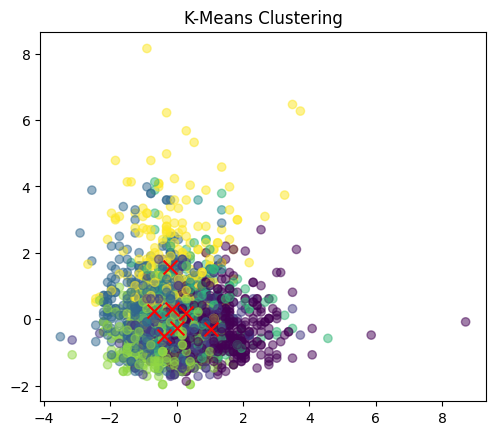

In [26]:
from sklearn.metrics import silhouette_score

# Define the kmeans algorithm
def kmeans(X, n_clusters, max_iter=300):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of points in each cluster
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

def plot_clusters(X, labels, centroids):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)
    
    plt.title('K-Means Clustering')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


# Example usage:
n_clusters = 7
labels, centroids = kmeans(X_train, n_clusters)

plot_clusters(X_train, labels, centroids)